# Lab session 7: Test 
__Name: Makesh Srinivasan<br>
Registration number: 19BCE1717<br>
Course code: CSE4020<br>
Faculty: Dr. Abdul Quadir<br>
Slot: L31 + L32<br>
Date: 27-September-2021 Monday__<br><br>
    
Instructions:<br>
Generate a simple linear regression model, multi-linear regression model and information gain and entropy in decision tree manually without the use of built-in package (sklearn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1) Simple linear regression

__Dataset__

The dataset is created by genarating x values from 0 to 100, and generating y values using a inear function (y = 3x + 0.75) and noise is introduced as shown below

In [2]:
x = np.array([i for i in range(0, 100)])
y = np.array([((i*3)+(3/4)) for i in x])
noise = np.random.normal(1, 10, y.shape)
y = y + noise
print("Created a dataset with x and y values")

Created a dataset with x and y values


__Simple linear regression__ <br>
Hypothesis: y = w0 + w1x <br>
__Calculation of coefficients:__

In [3]:
sum_xy = 0
sum_x = 0
sum_y = 0
sumxsq = 0
N = len(y)
for i in range(len(x)):
    sum_xy += x[i]*y[i]
    sum_x += x[i]
    sum_y += y[i]
    sumxsq += (x[i]*x[i])
w1 = (sum_xy) - ((sum_x*sum_y)/N)
w1 = w1/((sumxsq) - ((sum_x*sum_x)/N))
w0 = (sum_y/N) - w1*(sum_x/N)
print("W0 = ", w0)
print("W1 = ", w1)

W0 =  -0.32833539144689894
W1 =  3.0354671043926973


The coefficients (m and c) of the function y=mx+c that best fits the points are printed

__Prediction:__

In [4]:
y_pred = w0 + w1*x

<p>The predictions are made and stored in the function shown above</p>

__Visualisation of the simple linear regression__

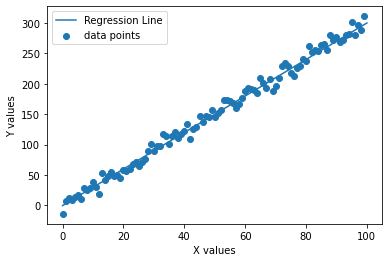

In [5]:
x1 = np.linspace(0, 100, 100)
plt.plot(x1, y_pred, label='Regression Line')
plt.scatter(x, y, label='data points')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

__R squared value__

The R squared value shows how good the line (predicted function) fits the scatter plot (dataset)

In [6]:
unexplained_variation = 0
total_variation = 0
mean_y = np.mean(y)
for i in range(0,len(y)):
    total_variation += (y[i] - mean_y) ** 2
    unexplained_variation += (y[i] - y_pred[i]) ** 2
r2 = 1 - (unexplained_variation/total_variation)
print("R^2 = ", r2)

R^2 =  0.9912192902126838


<hr>

# 2) Multi-linear regression

__Dataset__

A dataset was acquired from Kaggle: https://www.kaggle.com/mirichoi0218/insurance

In [7]:
data = pd.read_csv("insurance.csv")
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

__Pre-processing:__

There are some non-numeric values that are to be replaced. To replace the non-numeric values in each column, we need to know the different entries made. For each entry, we assign a numeric value

In [8]:
print("sex: ", data["sex"].unique())
print("smoker: ", data["smoker"].unique())
print("region: ", data["region"].unique())

sex:  ['female' 'male']
smoker:  ['yes' 'no']
region:  ['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
data.sex.replace(('female', 'male'), (0,1), inplace=True)
data.smoker.replace(('no', 'yes'), (0,1), inplace=True)
data.region.replace(('southwest', 'southeast', 'northwest', 'northeast'), (1,2,3,4), inplace=True)
# sex: female = 0, male = 1
# smoker: no = 0, yes = 1
# region: southwest = 1, southeast = 2, northwest = 3, northeast = 4

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None


Now that the dataset is fully numeric, we can verify that the dataset contains no NaN values (shown below)

In [11]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [12]:
data.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       1  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       3  21984.47061
4   32    1  28.880         0       0       3   3866.85520

The final pre-processed dataset is printed. We can now start training the multi-linear regression model using the normal-method of matrix multiplication. But before we go into building the regression model, we can observe the correlation between features as follows using heatmap

__Visualisation of data__

<center>Heatmap</center>

<AxesSubplot:>

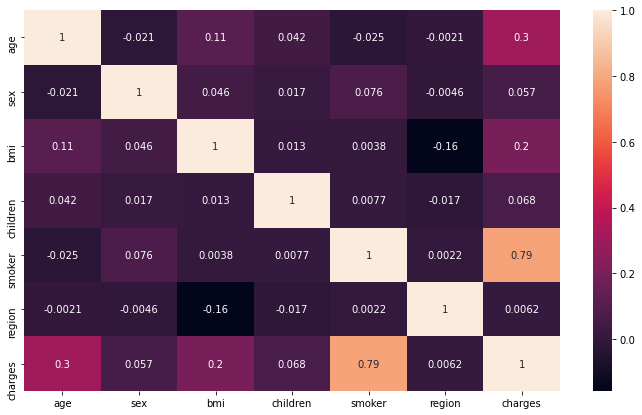

In [13]:
import seaborn as sb
corr=data.corr()
plt.figure(figsize = (12,7))
sb.heatmap(corr, annot=True)

<center>Pairplot</center>

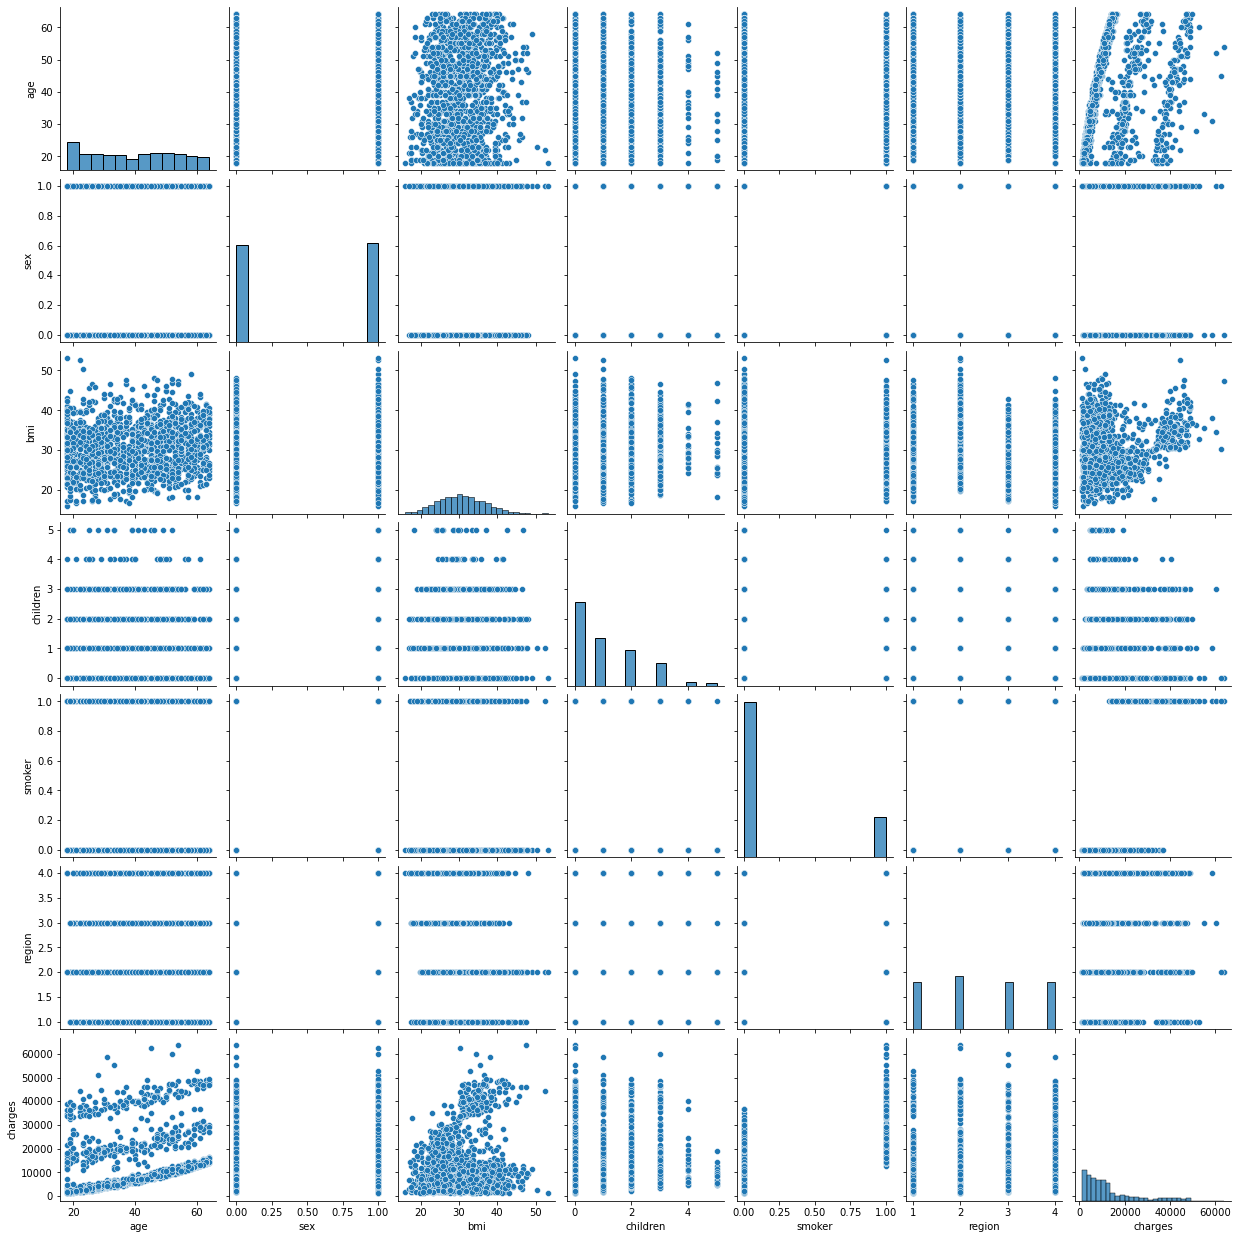

In [14]:
sb.pairplot(data,hue=None)

Now that the features are visualised, we can move to building the Multiple-linear regression model

__Normal method of matrix multiplication__<br>
1) Generate the design matrix (d)<br>
2) Hypothesise a linear function: w1x1+w2x2+x3x3+w4x4+w5x5+w6x6+w0 = y<br>
3) Weights (w) = Inverse(dT*d) * (dT*r) where dT is the transpose of d, r is the column vector of target values (charges), and w is the matrix with the coefficients<br>

In [15]:
x = np.array(data.iloc[:,0:6])
y = np.array(data.iloc[:,6])
ones = np.full((len(y), 1), 1)
x = np.append(ones, x, axis=1)

In [16]:
r = y
d = x
dT = np.transpose(d)

In [17]:
weights = np.matmul(np.linalg.inv(np.matmul(dT,d)), np.matmul(dT,r))

__Calculation of weights:__

In [18]:
w0 = weights[0]
w1 = weights[1]
w2 = weights[2]
w3 = weights[3]
w4 = weights[4]
w5 = weights[5]
w6 = weights[6]

The weights are calculated. The prediction using the function:

__Prediction:__

In [19]:
y_pred = np.empty(len(y))
for i in range(0,len(y)):
    y_pred[i] = w1*x[i,1] + w2*x[i,2] + w3*x[i,3] + w4*x[i,4] + w5*x[i,5] + w6*x[i,6] + w0

__The R squared value:__

In [20]:
unexplained_variation = 0
total_variation = 0
mean_y = np.mean(y)
for i in range(0,len(y)):
    total_variation += (y[i] - mean_y) ** 2
    unexplained_variation += (y[i] - y_pred[i]) ** 2
r2 = 1 - (unexplained_variation/total_variation)
print("R^2 = ", r2)

R^2 =  0.7507372027994933


__Checking with regression model__ (FOR VERIFICATION ONLY)<br>
The manual calculations are done as shown above. The following lines are to check if the manual calculations are right

In [21]:
from sklearn import linear_model
from sklearn import metrics
regression = linear_model.LinearRegression()
d = data.values
train_x = (d[:,0:6])
train_y = d[:,6]
regression.fit(train_x, train_y)
y_predicted = regression.predict(train_x)

In [22]:
unexplained_variation = 0
total_variation = 0
mean_y = np.mean(train_y)
for i in range(0,len(train_y)):
    total_variation += (train_y[i] - mean_y) ** 2
    unexplained_variation += (train_y[i] - y_predicted[i]) ** 2
r2 = 1 - (unexplained_variation/total_variation)
print("R^2 = ", r2)

R^2 =  0.7507372027994936


The matrix method (manually calculated) gives the same result for R squared value as the built-in LinearRegression model from sklearn package.
Hence, the manual method can be considered correct

<hr>

# 3) Decision tree

__Dataset__

In [23]:
df = pd.read_csv("crabs.csv")
df.head()

n sp sex  index   FL   RW    CL    CW   BD
0  1  B   M      1  8.1  6.7  16.1  19.0  7.0
1  2  B   M      2  8.8  7.7  18.1  20.8  7.4
2  3  B   M      3  9.2  7.8  19.0  22.4  7.7
3  4  B   M      4  9.6  7.9  20.1  23.1  8.2
4  5  B   M      5  9.8  8.0  20.3  23.0  8.2

__Preprocessing__

The dataset contains many columns, but the column "index" and "np" are not needed as they have no significance in the determination of the label. They are index values and are not dependent on the tuple values of the respective crab. In other words, they have very low correlation

In [24]:
df = df[['FL', 'sex', 'RW', 'BD', 'CL', 'CW', 'sp']]
df.head()

FL sex   RW   BD    CL    CW sp
0  8.1   M  6.7  7.0  16.1  19.0  B
1  8.8   M  7.7  7.4  18.1  20.8  B
2  9.2   M  7.8  7.7  19.0  22.4  B
3  9.6   M  7.9  8.2  20.1  23.1  B
4  9.8   M  8.0  8.2  20.3  23.0  B

Check for null values in the dataset

In [25]:
print(df.isnull().sum())

FL     0
sex    0
RW     0
BD     0
CL     0
CW     0
sp     0
dtype: int64


There are two non-numeric columns and they can be replaced as shown. This step is not necessary as Decision Tree algorithm is a classification algorithm and can contain feature of non-numeric datatypes, but this helps maintain uniformity across all features

In [26]:
print("sex: ", df["sex"].unique())
print("sp: ", df["sp"].unique())

sex:  ['M' 'F']
sp:  ['B' 'O']


In [27]:
df.sex.replace(('F', 'M'), (0,1), inplace=True)
df.sp.replace(('O', 'B'), (0,1), inplace=True)
# sex: female = 0, male = 1
# sp: O = 0, B = 1
df.head()

FL  sex   RW   BD    CL    CW  sp
0  8.1    1  6.7  7.0  16.1  19.0   1
1  8.8    1  7.7  7.4  18.1  20.8   1
2  9.2    1  7.8  7.7  19.0  22.4   1
3  9.6    1  7.9  8.2  20.1  23.1   1
4  9.8    1  8.0  8.2  20.3  23.0   1

The dataset is now preprocessed and ready for further steps

__Determination of values__

In [28]:
def calculate_entropy(df_label):
    classes, class_counts = np.unique(df_label, return_counts = True)
    entropy_value = 0
    array = []
    for i in range(len(classes)):
        array.append((-class_counts[i]/np.sum(class_counts))*np.log2(class_counts[i]/np.sum(class_counts)))
    entropy_value = np.sum(array)
    return entropy_value

In [29]:
def calculate_information_gain(dataset, feature, label): 
    dataset_entropy = calculate_entropy(dataset[label])   
    values, feat_counts= np.unique(dataset[feature], return_counts = True)
    array = []
    for i in range(len(values)):
        array.append((feat_counts[i]/np.sum(feat_counts))*calculate_entropy(dataset.where(dataset[feature] == values[i]).dropna()[label]))
    weighted_feature_entropy = np.sum(array)
    feature_info_gain = dataset_entropy - weighted_feature_entropy
    return feature_info_gain

In [30]:
features = df.columns[:-1]
label = 'sp'
parent = None
features

Index(['FL', 'sex', 'RW', 'BD', 'CL', 'CW'], dtype='object')

In [31]:
def create_decision_tree(dataset, df, features, label, parent):
    datum = np.unique(df[label], return_counts=True)
    unique_data = np.unique(dataset[label])
    if len(unique_data) <= 1:
        return unique_data[0]
    elif len(dataset) == 0:
        return unique_data[np.argmax(datum[1])]
    elif len(features) == 0:
        return parent
    else:
        print("Entropy at root node = ", calculate_entropy(dataset[label]))
        parent = unique_data[np.argmax(datum[1])]
        item_values = [calculate_information_gain(dataset, feature, label) for feature in features]
    print("\nInformation Gain at Root Nodes:")
    for i in range(len(features)):
        print(str(i+1) +") Information Gain at root node for feature "+ features[i] + " = " + str(item_values[i]))
    return parent

In [32]:
decision_tree = create_decision_tree(df, df, features, label, parent)

Entropy at root node =  1.0

Information Gain at Root Nodes:
1) Information Gain at root node for feature FL = 0.6149022499567306
2) Information Gain at root node for feature sex = 0.0
3) Information Gain at root node for feature RW = 0.44251394038145564
4) Information Gain at root node for feature BD = 0.5455307350520946
5) Information Gain at root node for feature CL = 0.7949022499567306
6) Information Gain at root node for feature CW = 0.6698044999134612


The entropy and information gain are printed. According to this dataset, CL (Carapace length) has the highest information gain at the root node.

<hr>
<center>End</center>